# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
ion_df = pd.read_csv('ionosphere_data.csv')

In [5]:
ion_df['label'].unique()

array(['g', 'b'], dtype=object)

In [6]:
ion_df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [7]:
ion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [8]:
ion_df['label'] = ion_df['label'].map({'g':1,'b':0})

In [9]:
ion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

<AxesSubplot:>

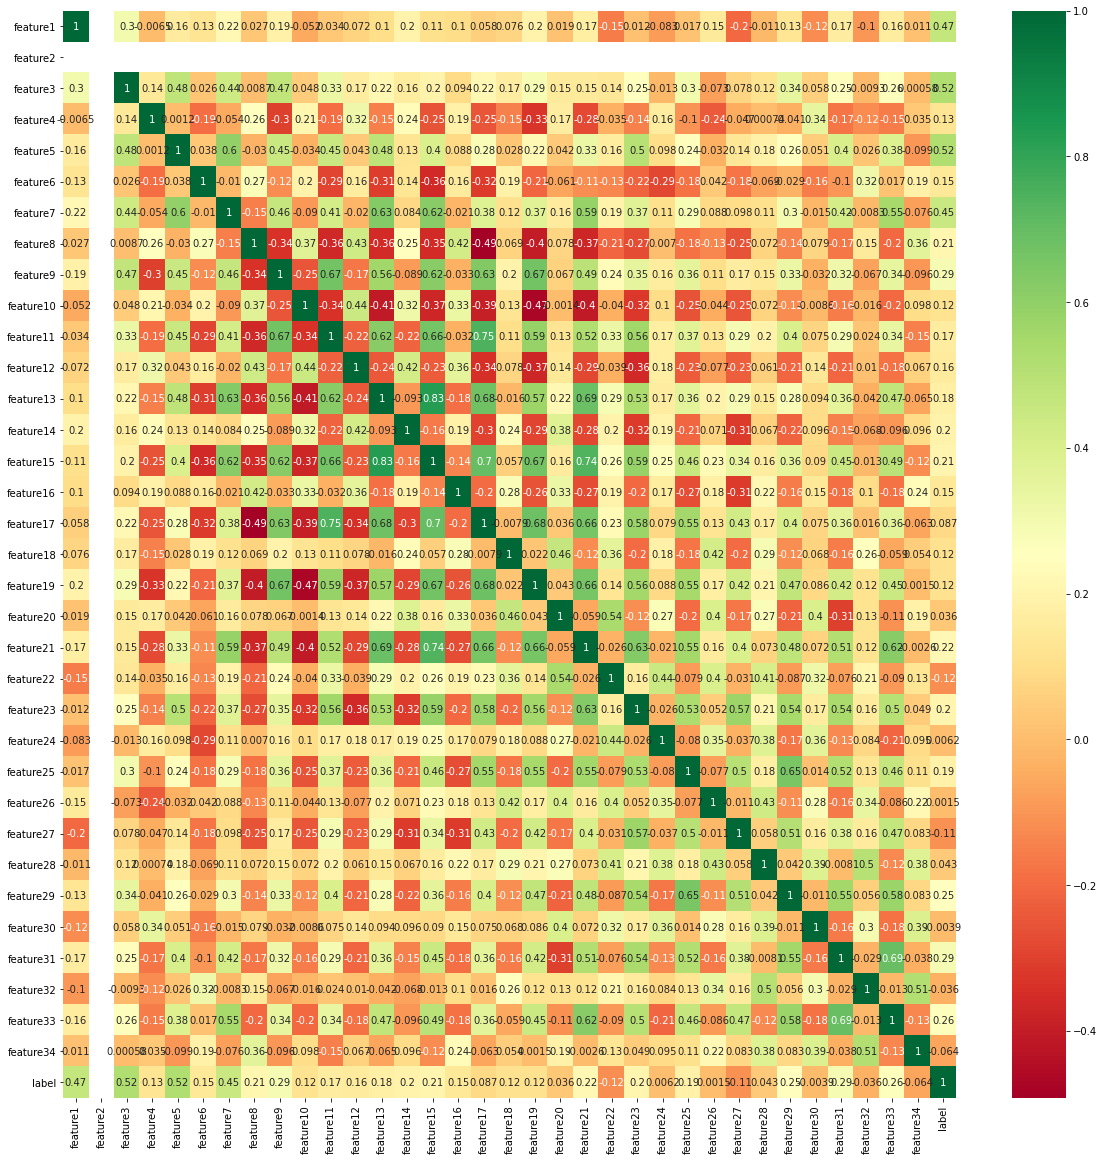

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(ion_df.corr(),annot=True,cmap="RdYlGn")

In [10]:
ion_df.corr()['label'].sort_values(ascending=False)

label        1.000000
feature3     0.519145
feature5     0.516477
feature1     0.465614
feature7     0.450429
feature9     0.294852
feature31    0.294417
feature33    0.261157
feature29    0.250036
feature21    0.219583
feature8     0.207544
feature15    0.207201
feature23    0.204361
feature14    0.197041
feature25    0.188185
feature13    0.181682
feature11    0.167908
feature12    0.159940
feature6     0.149099
feature16    0.148775
feature4     0.125884
feature10    0.120634
feature18    0.119346
feature19    0.117435
feature17    0.087060
feature28    0.042756
feature20    0.035620
feature24    0.006193
feature26    0.001541
feature30   -0.003942
feature32   -0.036004
feature34   -0.064168
feature27   -0.111107
feature22   -0.116385
feature2          NaN
Name: label, dtype: float64

# Select Features with high Correlation

In [11]:
ion = ion_df[['feature3','feature5','feature1','feature7','feature9',
              'feature31','feature33','feature29','feature21','feature27','feature22','label']]

In [12]:
ion.head()

,feature3,feature5,feature1,feature7,feature9,feature31,feature33,feature29,feature21,feature27,feature22,label
0,0.99539,0.85243,1,0.83398,1.00000,0.42267,0.18641,0.21266,0.56971,0.41078,-0.29674,1
1,1.00000,0.93035,1,-0.10868,1.00000,-0.16626,-0.13738,-0.19040,-0.13151,-0.20468,-0.45300,0
2,1.00000,1.00000,1,1.00000,0.88965,0.60436,0.56045,0.43100,0.70887,0.58984,-0.27502,1
3,1.00000,1.00000,1,0.71216,0.00000,0.25682,-0.32382,1.00000,-0.69975,0.51613,1.00000,0
4,1.00000,0.94140,1,0.92106,0.77152,-0.05707,-0.04608,0.02431,0.05982,0.13290,-0.35575,1


# Split Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = (ion.loc[:, ion.columns != 'label'])
y = (ion.loc[:, ion.columns == 'label'])

In [15]:
# Split to 50% Train and 50% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(210, 11)
(141, 11)
(210, 1)
(141, 1)


# Scale Data

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [18]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.fit_transform(x_test)

y_train_s = min_max_scaler.fit_transform(y_train)
y_test_s = min_max_scaler.fit_transform(y_test)

In [19]:
print(x_train_s.shape)
print(x_test_s.shape)

print(y_train_s.shape)
print(y_test_s.shape)

(210, 11)
(141, 11)
(210, 1)
(141, 1)


# Build Model

In [20]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=11))
model.add(Dense(units = 1, activation='relu'))

In [21]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [22]:
hist = model.fit(
    x_train, y_train, epochs = 100
)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 9.4500 - accuracy: 0.3755
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 9.8611 - accuracy: 0.3439
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 9.5586 - accuracy: 0.3667
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 10.0395 - accuracy: 0.3376
Epoch 5/100
7/7 [==============================] - 0s 996us/step - loss: 10.0152 - accuracy: 0.3287
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 9.7261 - accuracy: 0.3612
Epoch 7/100
7/7 [==============================] - 0s 997us/step - loss: 9.9172 - accuracy: 0.3444
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 9.7124 - accuracy: 0.3564
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 9.3944 - accuracy: 0.3784
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 9.8287 - accuracy: 0.3510
Epoch 11/100
7/7 [=====

7/7 [==============================] - 0s 997us/step - loss: 0.2440 - accuracy: 0.9344
Epoch 84/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9189
Epoch 85/100
7/7 [==============================] - 0s 831us/step - loss: 0.3167 - accuracy: 0.9185
Epoch 86/100
7/7 [==============================] - 0s 998us/step - loss: 0.2433 - accuracy: 0.9251
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9055
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9292
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.9137
Epoch 90/100
7/7 [==============================] - 0s 995us/step - loss: 0.2199 - accuracy: 0.9252
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.9027
Epoch 92/100
7/7 [==============================] - 0s 815us/step - loss: 0.1753 - accuracy: 0.9240
Epoch 93/100
7/7 [=====

# Check Accuracy of Model based on Test Data

# Model Accuracy is 89.3%

In [23]:
model.evaluate(x_test, y_test)[1]

5/5 [==============================] - 0s 0s/step - loss: 0.5332 - accuracy: 0.8936


0.8936170339584351

# Predict Outcomes

In [24]:
predictions = model.predict(x_test)
prediction2 = np.where(predictions>= 0.87, 1,0)

In [25]:
print(len(prediction2))
print(len(x_test))

141
141
